In [129]:
import act
import glob
import matplotlib.pyplot as plt
import matplotlib
import pyart
import xarray as xr
import datetime
import numpy as np
import pandas as pd
from matplotlib.dates import DateFormatter

%matplotlib inline

In [132]:
files = glob.glob('../data/cl61/rain/cmscl6001_197001*')

ds = act.io.read_netcdf(files)
ds['backscatter'] = ds['p_pol']
ds = act.corrections.correct_ceil(ds)

# apply range correction


In [133]:
ds

<xarray.Dataset>
Dimensions:                            (time: 2995, layer: 5, range: 3276)
Coordinates:
  * time                               (time) datetime64[ns] 1970-01-12T22:21...
  * range                              (range) float64 0.0 4.8 ... 1.572e+04
  * layer                              (layer) float64 1.0 2.0 3.0 4.0 5.0
    longitude                          float64 -87.72
    latitude                           float64 41.98
Data variables: (12/27)
    cloud_base_heights                 (time, layer) float64 dask.array<chunksize=(5, 5), meta=np.ndarray>
    vertical_visibility                (time) float64 dask.array<chunksize=(5,), meta=np.ndarray>
    p_pol                              (time, range) float32 dask.array<chunksize=(5, 3276), meta=np.ndarray>
    x_pol                              (time, range) float32 dask.array<chunksize=(5, 3276), meta=np.ndarray>
    beta_att                           (time, range) float32 dask.array<chunksize=(5, 3276), meta=np.ndarray>
    linear_depol_ratio                 (time, range) float32 dask.array<chunksize=(5, 3276), meta=np.ndarray>
    ...                                 ...
    receiver_gain                      (time) float32 dask.array<chunksize=(5,), meta=np.ndarray>
    range_resolution                   (time) float64 4.8 4.8 4.8 ... 4.8 4.8
    cloud_calibration_factor           (time) float64 0.4334 0.4334 ... 0.4334
    cloud_calibration_factor_user      (time) float64 0.4334 0.4334 ... 0.4334
    overlap_function                   (time, range) float32 dask.array<chunksize=(5, 3276), meta=np.ndarray>
    backscatter                        (time, range) float32 dask.array<chunksize=(5, 3276), meta=np.ndarray>
Attributes: (12/18)
    title:                          CL61D CL61 with Depolarization
    institution:                    NEIU
    source:                         
    conventions:                    CF-1.8
    schema_version:                 1.3
    sw_version:                     1.2.7
    ...                             ...
    file_temporal_span_in_minutes:  5.0
    profile_interval_in_seconds:    60
    _file_dates:                    ['19700112', '19700112', '19700112', '197...
    _file_times:                    ['222110', '222110', '222110', '222110', ...
    _datastream:                    act_datastream
    _arm_standards_flag:            0

In [134]:
started_at = '2023-05-27T14:35:00.000000'
file_zero =  '1970-01-01T00:11:10.000000'
ds['realtime'] = ds.time + (np.datetime64(started_at) - np.datetime64(file_zero))
#ds['realtime'] = ds.time + (np.datetime64('2023-05-15T20:11:00.000000') - ds.time[0])

ds = ds.set_index(time='realtime')
# 5 10:14 live_19700101_001100.nc

In [135]:
# 5/15 3:11 -- 112 1915

In [136]:
ds

<xarray.Dataset>
Dimensions:                            (time: 2995, layer: 5, range: 3276)
Coordinates:
  * time                               (time) datetime64[ns] 2023-06-08T12:45...
  * range                              (range) float64 0.0 4.8 ... 1.572e+04
  * layer                              (layer) float64 1.0 2.0 3.0 4.0 5.0
    longitude                          float64 -87.72
    latitude                           float64 41.98
Data variables: (12/27)
    cloud_base_heights                 (time, layer) float64 dask.array<chunksize=(5, 5), meta=np.ndarray>
    vertical_visibility                (time) float64 dask.array<chunksize=(5,), meta=np.ndarray>
    p_pol                              (time, range) float32 dask.array<chunksize=(5, 3276), meta=np.ndarray>
    x_pol                              (time, range) float32 dask.array<chunksize=(5, 3276), meta=np.ndarray>
    beta_att                           (time, range) float32 dask.array<chunksize=(5, 3276), meta=np.ndarray>
    linear_depol_ratio                 (time, range) float32 dask.array<chunksize=(5, 3276), meta=np.ndarray>
    ...                                 ...
    receiver_gain                      (time) float32 dask.array<chunksize=(5,), meta=np.ndarray>
    range_resolution                   (time) float64 4.8 4.8 4.8 ... 4.8 4.8
    cloud_calibration_factor           (time) float64 0.4334 0.4334 ... 0.4334
    cloud_calibration_factor_user      (time) float64 0.4334 0.4334 ... 0.4334
    overlap_function                   (time, range) float32 dask.array<chunksize=(5, 3276), meta=np.ndarray>
    backscatter                        (time, range) float32 dask.array<chunksize=(5, 3276), meta=np.ndarray>
Attributes: (12/18)
    title:                          CL61D CL61 with Depolarization
    institution:                    NEIU
    source:                         
    conventions:                    CF-1.8
    schema_version:                 1.3
    sw_version:                     1.2.7
    ...                             ...
    file_temporal_span_in_minutes:  5.0
    profile_interval_in_seconds:    60
    _file_dates:                    ['19700112', '19700112', '19700112', '197...
    _file_times:                    ['222110', '222110', '222110', '222110', ...
    _datastream:                    act_datastream
    _arm_standards_flag:            0

In [137]:
ds['backscatter'] = ds['p_pol']
ds = act.corrections.correct_ceil(ds)

(0.0, 5000.0)

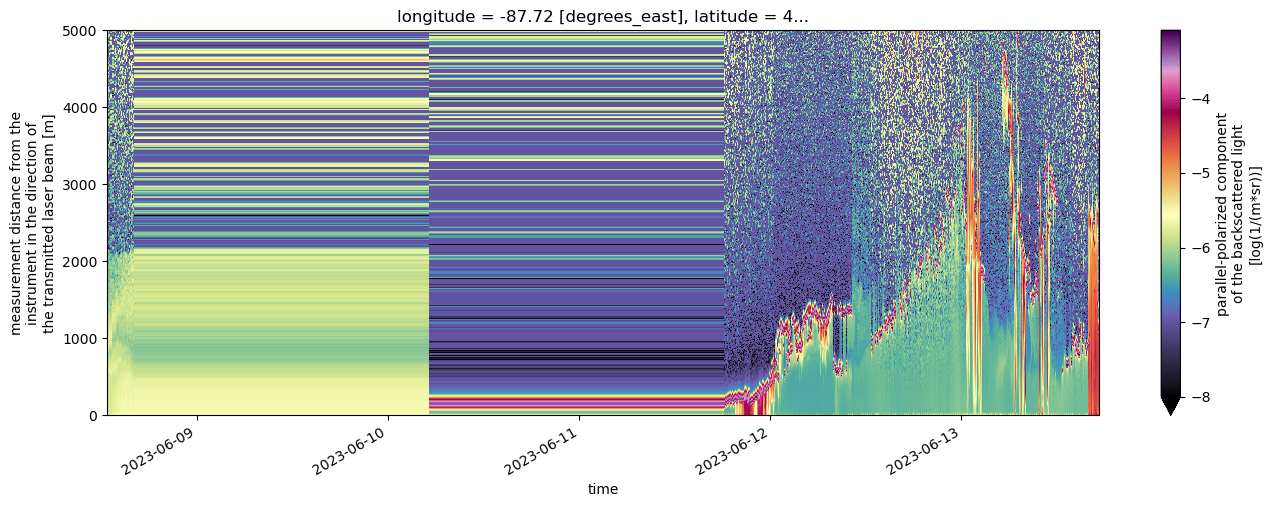

In [138]:
%matplotlib inline
figme = plt.figure(figsize=[16,5])
ds.backscatter.transpose().plot( cmap=pyart.graph.cm_colorblind.ChaseSpectral, vmin = -8)
plt.ylim([0,5000])

(0.0, 5000.0)

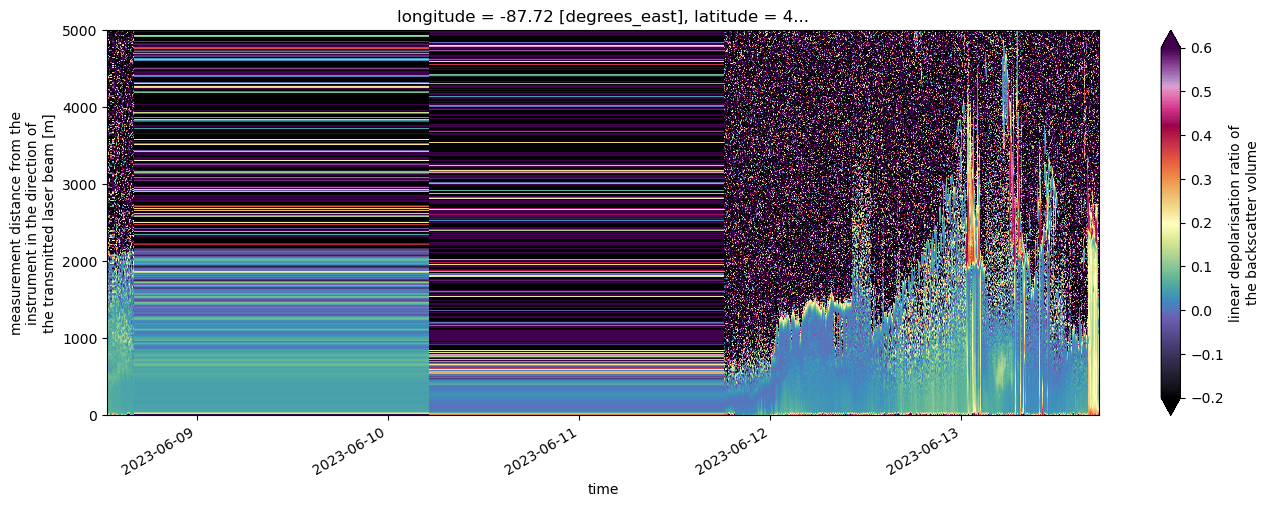

In [139]:
%matplotlib inline
figme = plt.figure(figsize=[16,5])
ds.linear_depol_ratio.transpose().plot( cmap=pyart.graph.cm_colorblind.ChaseSpectral, vmax=.6, vmin=-.2)
plt.ylim([0,5000])

(19521.416666666668, 19521.708333333332)

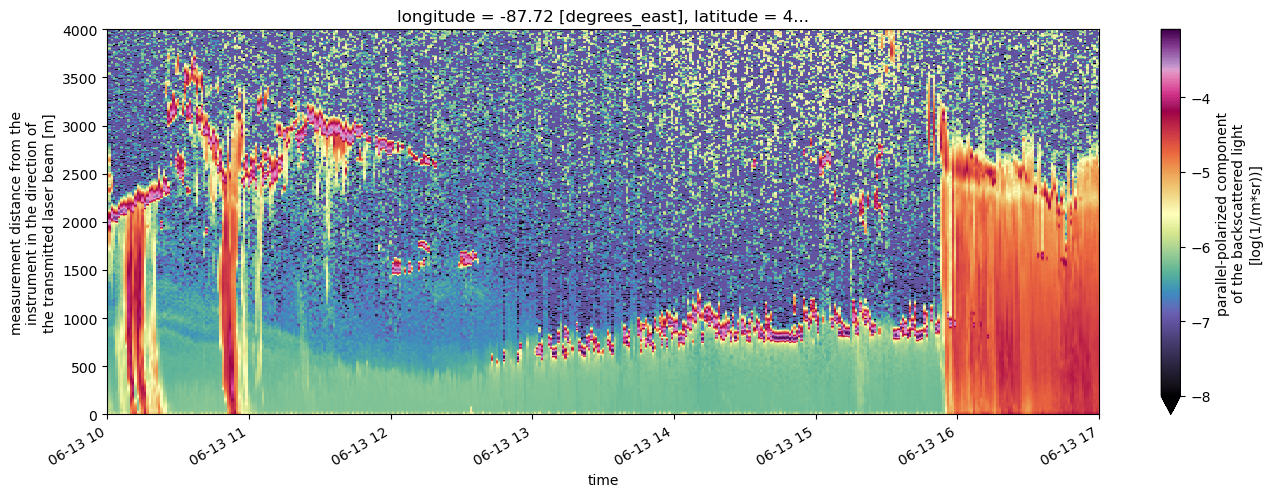

In [142]:
time1 = pd.Timestamp("2023-06-13 10:00:00")
time2 = pd.Timestamp("2023-06-13 17:00:00")

%matplotlib inline
figme = plt.figure(figsize=[16,5])
ds.backscatter.transpose().plot( cmap=pyart.graph.cm_colorblind.ChaseSpectral, vmin = -8)
plt.ylim([0,4000])
plt.xlim([time1, time2])

(19514.708333333332, 19514.833333333332)

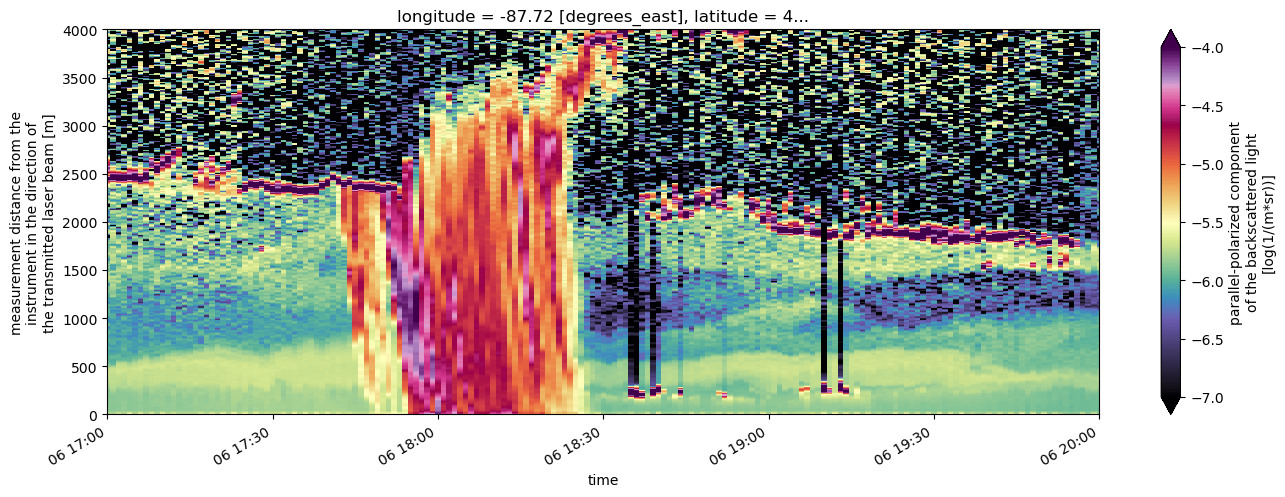

In [102]:
time1 = pd.Timestamp("2023-06-06 17:00:00")
time2 = pd.Timestamp("2023-06-06 20:00:00")

%matplotlib inline
figme = plt.figure(figsize=[16,5])
ds.backscatter.transpose().plot( cmap=pyart.graph.cm_colorblind.ChaseSpectral, vmin = -7, vmax=-4)
plt.ylim([0,4000])
plt.xlim([time1, time2])

(19514.708333333332, 19514.833333333332)

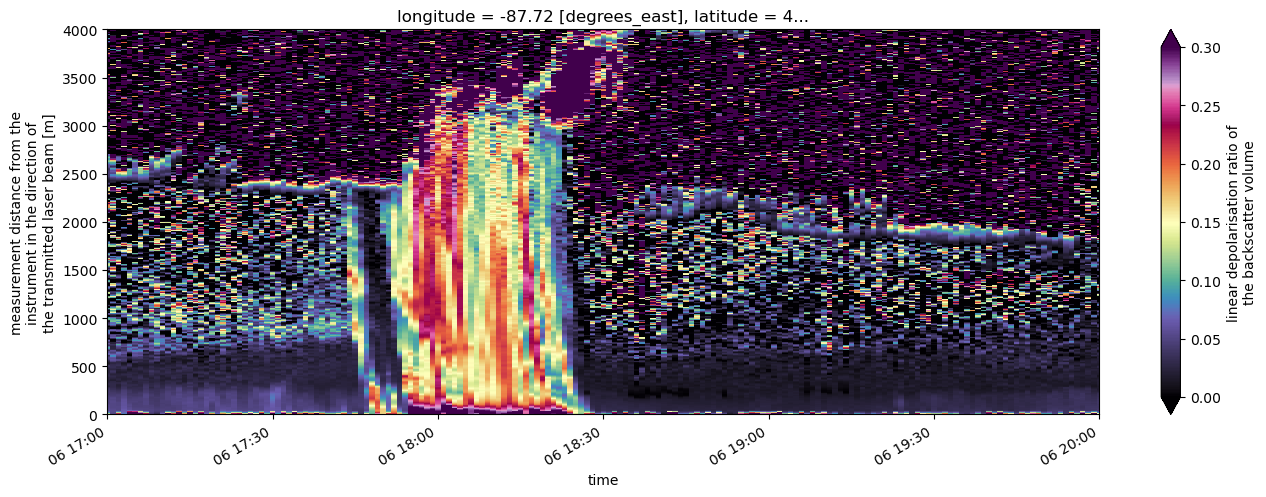

In [103]:
%matplotlib inline
figme = plt.figure(figsize=[16,5])
ds.linear_depol_ratio.transpose().plot( cmap=pyart.graph.cm_colorblind.ChaseSpectral, vmax=.3, vmin=0)
plt.ylim([0,4000])
plt.xlim([time1, time2])

In [104]:
ds.to_netcdf('/Users/scollis/june_smoke_rain_CL61.nc')

In [120]:
time1 = pd.Timestamp("2023-06-06 00:00:00")
time2 = pd.Timestamp("2023-06-07 00:00:00")
today = ds.sel(time=slice(time1, time2))

In [121]:
today

<xarray.Dataset>
Dimensions:                            (time: 1440, layer: 5, range: 3276)
Coordinates:
  * time                               (time) datetime64[ns] 2023-06-06T00:00...
  * range                              (range) float64 0.0 4.8 ... 1.572e+04
  * layer                              (layer) float64 1.0 2.0 3.0 4.0 5.0
    longitude                          float64 -87.72
    latitude                           float64 41.98
Data variables: (12/27)
    cloud_base_heights                 (time, layer) float64 dask.array<chunksize=(5, 5), meta=np.ndarray>
    vertical_visibility                (time) float64 dask.array<chunksize=(5,), meta=np.ndarray>
    p_pol                              (time, range) float32 dask.array<chunksize=(5, 3276), meta=np.ndarray>
    x_pol                              (time, range) float32 dask.array<chunksize=(5, 3276), meta=np.ndarray>
    beta_att                           (time, range) float32 dask.array<chunksize=(5, 3276), meta=np.ndarray>
    linear_depol_ratio                 (time, range) float32 dask.array<chunksize=(5, 3276), meta=np.ndarray>
    ...                                 ...
    receiver_gain                      (time) float32 dask.array<chunksize=(5,), meta=np.ndarray>
    range_resolution                   (time) float64 4.8 4.8 4.8 ... 4.8 4.8
    cloud_calibration_factor           (time) float64 0.4334 0.4334 ... 0.4334
    cloud_calibration_factor_user      (time) float64 0.4334 0.4334 ... 0.4334
    overlap_function                   (time, range) float32 dask.array<chunksize=(5, 3276), meta=np.ndarray>
    backscatter                        (time, range) float32 dask.array<chunksize=(5, 3276), meta=np.ndarray>
Attributes: (12/18)
    title:                          CL61D CL61 with Depolarization
    institution:                    NEIU
    source:                         
    conventions:                    CF-1.8
    schema_version:                 1.3
    sw_version:                     1.2.7
    ...                             ...
    file_temporal_span_in_minutes:  5.0
    profile_interval_in_seconds:    60
    _file_dates:                    ['19700108', '19700108', '19700108', '197...
    _file_times:                    ['235111', '235111', '235111', '235111', ...
    _datastream:                    act_datastream
    _arm_standards_flag:            0

(0.0, 5000.0)

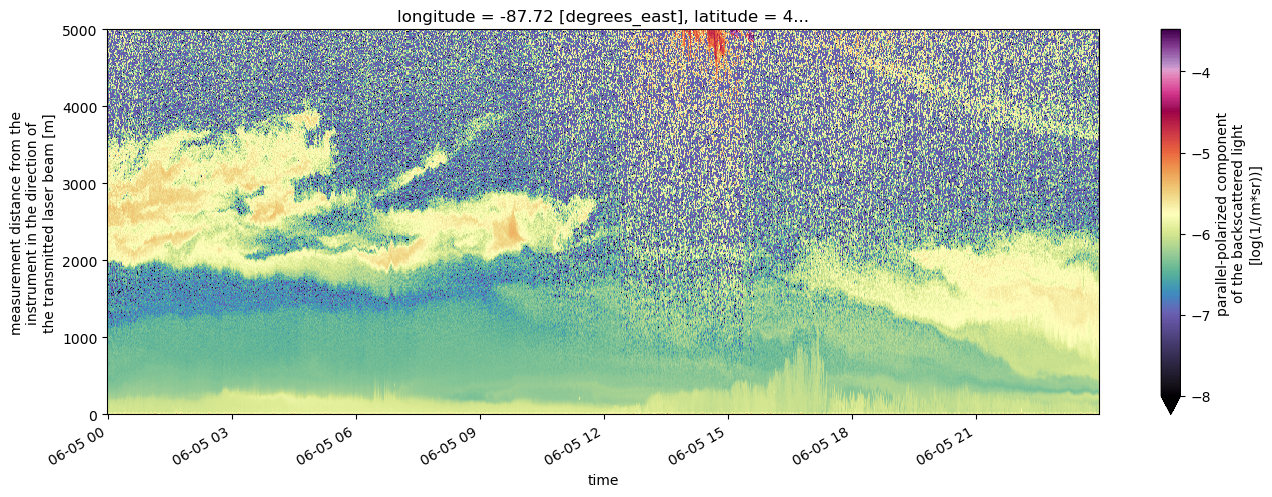

In [115]:
%matplotlib inline
figme = plt.figure(figsize=[16,5])
today.backscatter.transpose().plot( cmap=pyart.graph.cm_colorblind.ChaseSpectral, vmin = -8)
plt.ylim([0,5000])

In [122]:
today.to_netcdf('/Users/scollis/data/cms-cl61-001-a1-20230606.nc')

In [123]:
test_my_read = xr.open_dataset('/Users/scollis/data/cms-cl61-001-a1-20230606.nc')

In [124]:
test_my_read

<xarray.Dataset>
Dimensions:                            (time: 1440, layer: 5, range: 3276)
Coordinates:
  * time                               (time) datetime64[ns] 2023-06-06T00:00...
  * range                              (range) float64 0.0 4.8 ... 1.572e+04
  * layer                              (layer) float64 1.0 2.0 3.0 4.0 5.0
    longitude                          float64 ...
    latitude                           float64 ...
Data variables: (12/27)
    cloud_base_heights                 (time, layer) float64 ...
    vertical_visibility                (time) float64 ...
    p_pol                              (time, range) float32 ...
    x_pol                              (time, range) float32 ...
    beta_att                           (time, range) float32 ...
    linear_depol_ratio                 (time, range) float32 ...
    ...                                 ...
    receiver_gain                      (time) float32 ...
    range_resolution                   (time) float32 ...
    cloud_calibration_factor           (time) float64 ...
    cloud_calibration_factor_user      (time) float64 ...
    overlap_function                   (time, range) float32 ...
    backscatter                        (time, range) float32 ...
Attributes: (12/18)
    title:                          CL61D CL61 with Depolarization
    institution:                    NEIU
    source:                         
    conventions:                    CF-1.8
    schema_version:                 1.3
    sw_version:                     1.2.7
    ...                             ...
    file_temporal_span_in_minutes:  5.0
    profile_interval_in_seconds:    60
    _file_dates:                    ['19700108', '19700108', '19700108', '197...
    _file_times:                    ['235111', '235111', '235111', '235111', ...
    _datastream:                    act_datastream
    _arm_standards_flag:            0

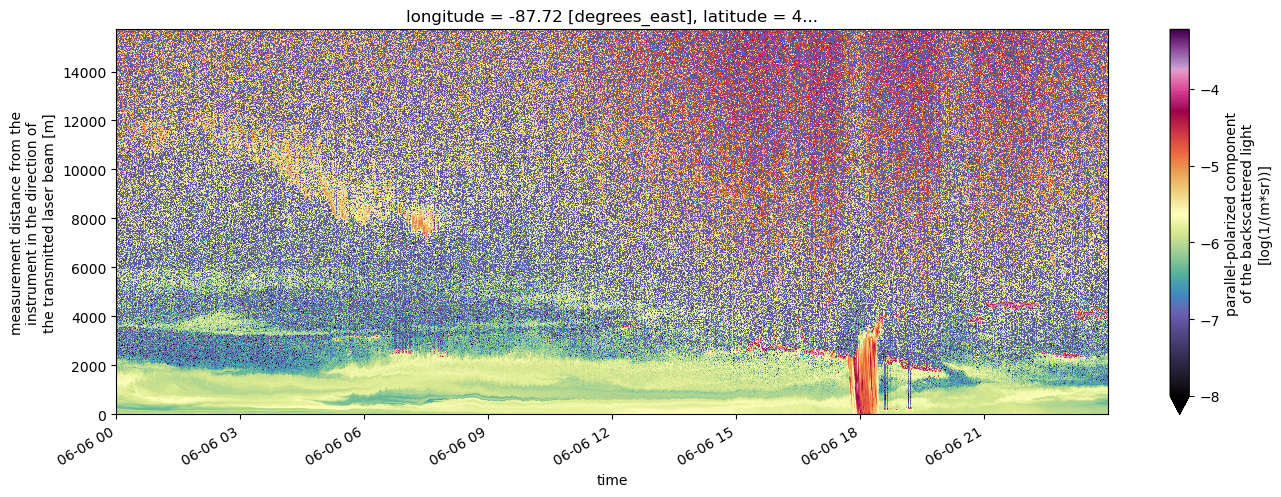

In [125]:

figme = plt.figure(figsize=[16,5])
test_my_read.backscatter.transpose().plot( cmap=pyart.graph.cm_colorblind.ChaseSpectral, vmin = -8)
#plt.ylim([0,5000])

In [126]:
time1 = pd.Timestamp("2023-06-05 00:00:00")
time2 = pd.Timestamp("2023-06-07 00:00:00")
today = ds.sel(time=slice(time1, time2))
today.to_netcdf('/Users/scollis/data/QC-wildfire-plume.nc')

In [127]:
test_my_read = xr.open_dataset('/Users/scollis/data/QC-wildfire-plume.nc')

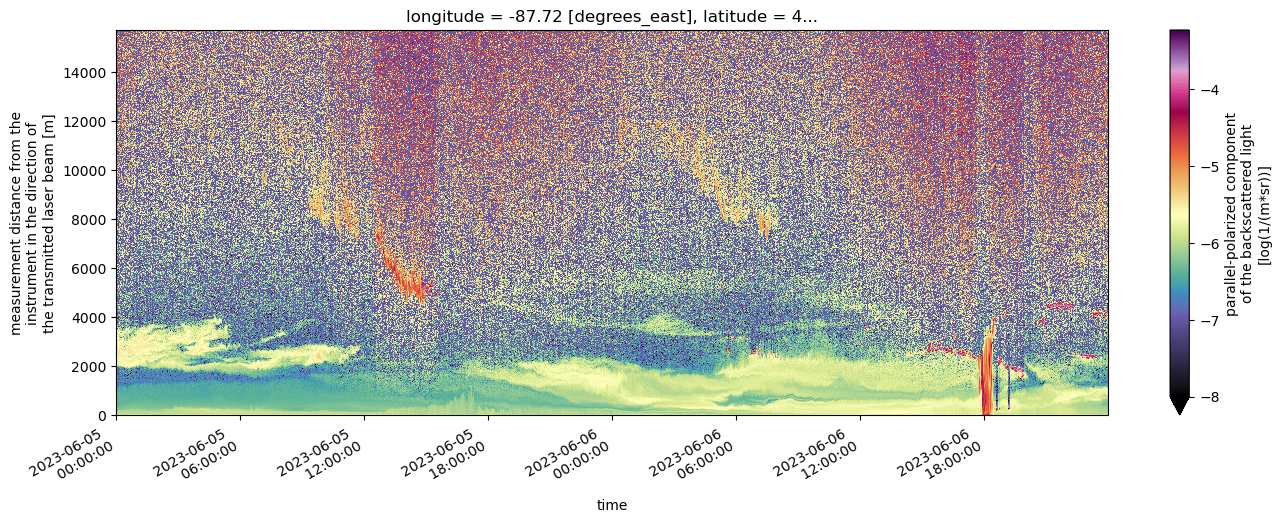

In [130]:
figme = plt.figure(figsize=[16,5])
test_my_read.backscatter.transpose().plot( cmap=pyart.graph.cm_colorblind.ChaseSpectral, vmin = -8)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
